In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.rcParams["figure.figsize"] = (12,5)
sns.set_style("darkgrid")

In [2]:
disease_path = Path("../data/disease_cases.csv")
sales_path   = Path("../data/medicine_sales.csv")

disease_df = pd.read_csv(disease_path)
sales_df   = pd.read_csv(sales_path)

# Remove unwanted columns
if "Unnamed: 0" in disease_df.columns:
    disease_df.drop(columns=["Unnamed: 0"], inplace=True)
if "Unnamed: 0" in sales_df.columns:
    sales_df.drop(columns=["Unnamed: 0"], inplace=True)

# Parse date
disease_df["date"] = pd.to_datetime(disease_df["date"], errors="coerce")
sales_df["date"]   = pd.to_datetime(sales_df["date"], errors="coerce")

df = pd.merge(disease_df, sales_df, on=["date", "location"], how="inner")

df["month"] = df["date"].dt.month
df["year"]  = df["date"].dt.year
df["disease_trend"] = df.groupby("location")["cases"].pct_change().fillna(0)

print("Merged shape:", df.shape)
df.head()

Merged shape: (45403, 9)


,date,location,cases,disease_type,sales_volume,medicine,month,year,disease_trend
0,2005-01-01,Hyderabad,149,Dengue,50,Paracetamol,1,2005,0.0
1,2005-01-01,Hyderabad,149,Dengue,117,ORS,1,2005,0.0
2,2005-01-01,Hyderabad,149,Dengue,177,Antibiotics,1,2005,0.0
3,2005-01-01,Hyderabad,149,Dengue,186,Chloroquine,1,2005,0.0
4,2005-01-01,Hyderabad,149,Dengue,22,Antibiotics,1,2005,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45403 entries, 0 to 45402
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           45403 non-null  datetime64[ns]
 1   location       45403 non-null  object        
 2   cases          45403 non-null  int64         
 3   disease_type   45403 non-null  object        
 4   sales_volume   45403 non-null  int64         
 5   medicine       45403 non-null  object        
 6   month          45403 non-null  int32         
 7   year           45403 non-null  int32         
 8   disease_trend  45403 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(3)
memory usage: 2.8+ MB


In [4]:
print("Missing Values:")
display(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())

Missing Values:


date             0
location         0
cases            0
disease_type     0
sales_volume     0
medicine         0
month            0
year             0
disease_trend    0
dtype: int64


Duplicates: 194


In [5]:
df.describe()

,date,cases,sales_volume,month,year,disease_trend
count,45403,45403.000000,45403.000000,45403.000000,45403.000000,45403.000000
mean,2015-05-25 22:52:40.020262912,120.141246,242.862036,6.483360,2014.941480,0.219850
min,2005-01-01 00:00:00,5.000000,20.000000,1.000000,2005.000000,-0.985915
25%,2010-03-01 00:00:00,79.000000,156.000000,3.000000,2010.000000,0.000000
50%,2015-05-01 00:00:00,119.000000,241.000000,6.000000,2015.000000,0.000000
75%,2020-09-01 00:00:00,160.000000,326.000000,9.000000,2020.000000,0.000000
max,2025-12-01 00:00:00,355.000000,737.000000,12.000000,2025.000000,60.600000
std,NaN,58.827211,121.636051,3.454156,6.055936,2.171448


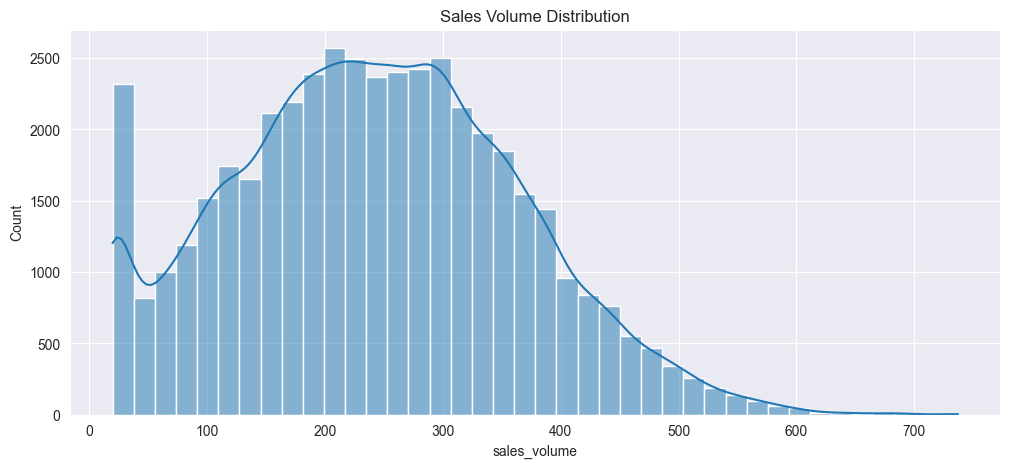

In [6]:
sns.histplot(df["sales_volume"], bins=40, kde=True)
plt.title("Sales Volume Distribution")
plt.show()

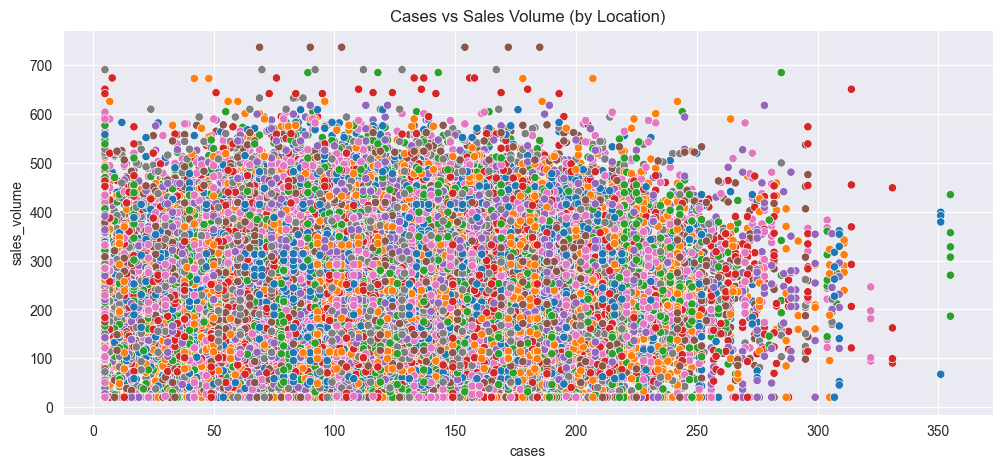

In [7]:
sns.scatterplot(data=df, x="cases", y="sales_volume", hue="location", legend=False)
plt.title("Cases vs Sales Volume (by Location)")
plt.show()

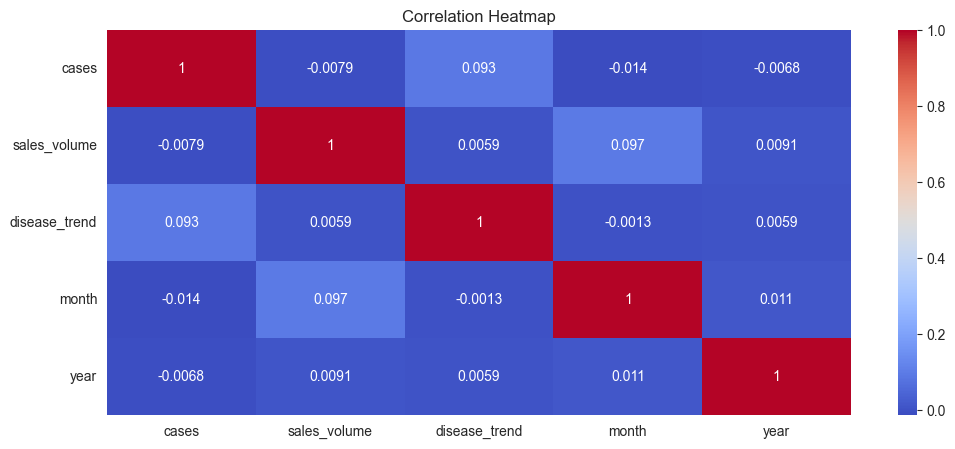

In [8]:
corr_cols = ["cases", "sales_volume", "disease_trend", "month", "year"]
corr = df[corr_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

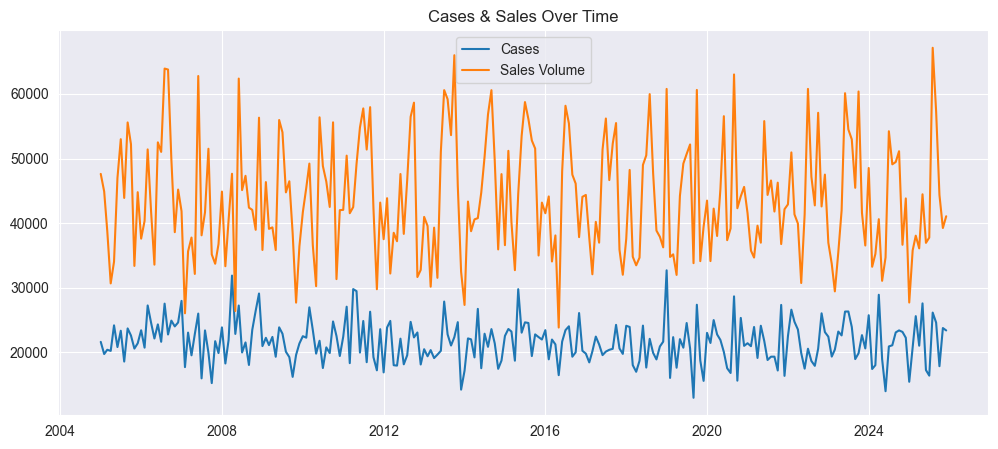

In [9]:
daily = df.groupby("date")[["cases","sales_volume"]].sum().reset_index()

plt.plot(daily["date"], daily["cases"], label="Cases")
plt.plot(daily["date"], daily["sales_volume"], label="Sales Volume")
plt.title("Cases & Sales Over Time")
plt.legend()
plt.show()

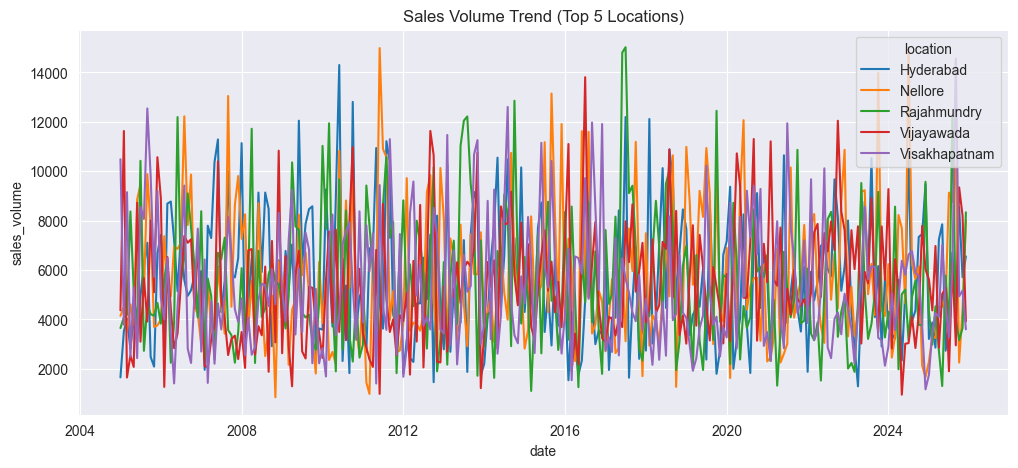

In [10]:
top_locations = df["location"].value_counts().head(5).index.tolist()

sub = df[df["location"].isin(top_locations)].copy()
sub = sub.groupby(["date","location"])[["sales_volume"]].sum().reset_index()

sns.lineplot(data=sub, x="date", y="sales_volume", hue="location")
plt.title("Sales Volume Trend (Top 5 Locations)")
plt.show()